In [222]:
import numpy as np
import pandas as pd
import mysql.connector as sqlconn
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
import matplotlib.cm as cm 
from sklearn.linear_model import LinearRegression
import warnings

warnings.filterwarnings('ignore')


### Create Connection

In [223]:
myconn = sqlconn.connect(
    host = 'localhost',
    user = 'root',
    password = '',
    port = '3306',
    database = 'air_temp'
)

### Query

In [224]:
curs = myconn.cursor()

def sql_table (query) :
    curs.execute (query)
    result = curs.fetchall()
    tabel = pd.DataFrame(result, columns=curs.column_names)
    return tabel

In [225]:
tabel = sql_table(
    '''
    select *
    from 30_percent
    '''
)

tabel.head()

,id,air_temp,actual_temp
0,1,64.76,64.76
1,2,None,63.86
2,3,64.22,64.22
3,4,None,64.40
4,5,64.40,64.40


### Convert table into a DataFrame

In [226]:
df = pd.DataFrame(tabel, columns = ("id", "air_temp", "actual_temp"))
df.head()

,id,air_temp,actual_temp
0,1,64.76,64.76
1,2,None,63.86
2,3,64.22,64.22
3,4,None,64.40
4,5,64.40,64.40


### Check info

In [227]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           60 non-null     int64 
 1   air_temp     42 non-null     object
 2   actual_temp  60 non-null     object
dtypes: int64(1), object(2)
memory usage: 1.5+ KB


### Change air_temp and actual_temp to float64

In [228]:
# Change air_temp and actual_temp to float64
df['air_temp'] = pd.to_numeric(df['air_temp'])
df['actual_temp'] = pd.to_numeric(df['actual_temp'])

### Re-check info

In [229]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           60 non-null     int64  
 1   air_temp     42 non-null     float64
 2   actual_temp  60 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 1.5 KB


### Check duplicated

In [230]:
df[df.duplicated()]

,id,air_temp,actual_temp


### Check null value

In [231]:
df.isnull().sum()

id              0
air_temp       18
actual_temp     0
dtype: int64

### Data Visualization & Statistics

In [232]:
# reshape
x = df['id'].values.reshape(-1,1)
y = df['actual_temp'].values

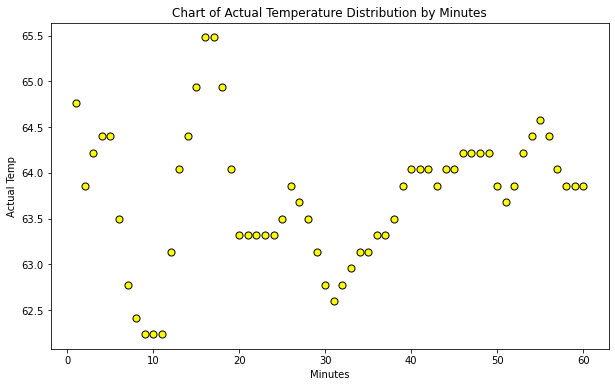

In [233]:
fig, ax = plt.subplots(figsize = (10, 6))
plt.scatter(x,y, s = 50, color = 'yellow', edgecolor = 'k')
plt.xlabel('Minutes')
plt.ylabel('Actual Temp')
plt.title('Chart of Actual Temperature Distribution by Minutes')
plt.show()

In [234]:
# Call the classifier
reg = LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

print('Shape of X train : ', X_train.shape)
print('Shape of y train : ', y_train.shape)

print('Shape of X test : ', X_test.shape)
print('Shape of y test : ', y_test.shape)

Shape of X train :  (42, 1)
Shape of y train :  (42,)
Shape of X test :  (18, 1)
Shape of y test :  (18,)


In [235]:
# Fit the regressor to the training data  
reg = reg.fit(X_train, y_train)
# Apply the regressor/model to the test data  
y_pred = reg.predict(X_test)
print('Y Pred: ', y_pred)

Y Pred:  [63.78610974 63.77737507 63.75117103 63.85161982 63.79047708 63.71186499
 63.65072225 63.68566095 63.63325289 63.79484442 63.78174241 63.71623233
 63.72059966 63.79921176 63.66382426 63.8603545  63.84725249 63.67692628]


In [236]:
y_pred = np.round_(y_pred, decimals = 2)
print ('Rounded values : ', y_pred)

Rounded values :  [63.79 63.78 63.75 63.85 63.79 63.71 63.65 63.69 63.63 63.79 63.78 63.72
 63.72 63.8  63.66 63.86 63.85 63.68]


In [237]:
print('Y Test: ', y_test)

Y Test:  [63.86 63.32 62.6  64.4  64.04 63.32 62.42 65.48 64.4  64.04 63.5  63.32
 63.32 64.04 62.24 64.4  64.22 64.4 ]


In [238]:
print('Y Train: ', y_train)

Y Train:  [63.32 65.48 64.22 62.96 64.04 63.86 63.86 62.24 63.86 63.86 63.14 63.32
 64.22 63.14 64.22 62.78 62.24 63.86 64.04 63.86 63.32 64.04 64.22 62.78
 63.14 64.76 64.04 64.94 64.4  63.5  64.58 63.14 63.68 62.78 63.5  63.86
 64.22 63.86 64.04 64.94 63.5  63.68]


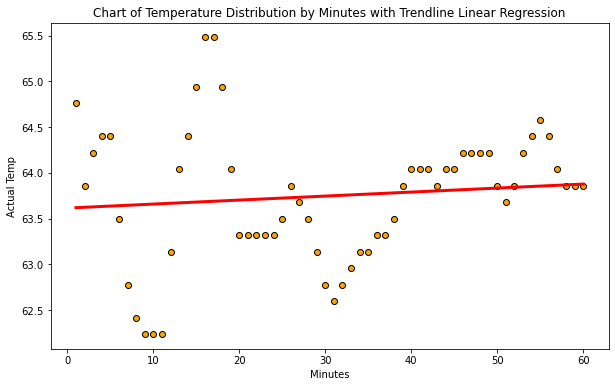

In [239]:
fig, ax = plt.subplots(figsize = (10, 6))
plt.scatter(x, y, color = 'orange', edgecolor = 'k')
plt.plot(x, reg.predict(x), color = 'red', linewidth = 3)
plt.xlabel('Minutes')
plt.ylabel('Actual Temp')
plt.title('Chart of Temperature Distribution by Minutes with Trendline Linear Regression')
plt.show()

### Calculating MSE. The lower value, the better it is. 0 means perfect prediction

In [240]:
# Rata-rata kesalahan kuadrat diantara nilai aktual dan nilai peramalan. 
# Digunakan untuk mengecek estimasi berapa nilai kesalahan pada peramalan
# MSE mendekati nol menunjukkan bahwa hasil peramalan sesuai dengan data aktual
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(y_test, y_pred)
print('Mean squared error of testing set :', mse)

Mean squared error of testing set : 0.6026555555555573


### Calculating MAE

In [241]:
# Rata-rata selisih mutlak nilai sebenarnya (aktual) dengan nilai prediksi (peramalan)
# Digunakan sebagai indikasi ketidakpastian pengukuran
# Mengukur keakuratan suatu model statistik dalam melakukan prediksi atau peramalan
mae = mean_absolute_error(y_test, y_pred)
print('Mean absolute error of testing set : ', mae)

Mean absolute error of testing set :  0.6266666666666687


### Evaluate Model Performance

In [242]:
print('Training Accuracy :', reg.score(X_train, y_train))  
print('Testing Accuracy :', reg.score(X_test, y_test))  

Training Accuracy : 0.013026489229075122
Testing Accuracy : 0.04110878305323784


### Save y_pred into DataFrame


In [243]:
df_y = pd.DataFrame(y_pred)

df_y.head()

,0
0,63.79
1,63.78
2,63.75
3,63.85
4,63.79


### Query and Slicing Data based on air_temp

In [244]:
new_tabel = sql_table(
    '''
    SELECT * FROM `air_temp`.`30_percent` WHERE `air_temp` IS NULL LIMIT 0,1000
    '''
)

In [245]:
second_tabel = sql_table(
    '''
    SELECT * FROM `air_temp`.`30_percent` WHERE `air_temp` IS NOT NULL LIMIT 0,1000
    '''
)

In [246]:
# DataFrame with air_temp is NULL
df = pd.DataFrame(new_tabel, columns = ("id", "air_temp", "actual_temp"))
print("DataFrame with air_temp is NULL")
df.head()

DataFrame with air_temp is NULL


,id,air_temp,actual_temp
0,2,None,63.86
1,4,None,64.40
2,10,None,62.24
3,13,None,64.04
4,17,None,65.48


In [247]:
# DataFrame with air_temp is NOT NULL 
df2 = pd.DataFrame(second_tabel, columns = ("id", "air_temp", "actual_temp"))
print("DataFrame with air_temp is NOT NULL")
df2.head()

DataFrame with air_temp is NOT NULL


,id,air_temp,actual_temp
0,1,64.76,64.76
1,3,64.22,64.22
2,5,64.40,64.40
3,6,63.50,63.50
4,7,62.78,62.78


#### Impute y_pred values into DataFrame which air_temp is NULL

In [248]:
df[df.columns[1]] = df_y[df_y.columns[0]].copy()

#### Re-check DataFrame after imputation

In [249]:
df.head()

,id,air_temp,actual_temp
0,2,63.79,63.86
1,4,63.78,64.40
2,10,63.75,62.24
3,13,63.85,64.04
4,17,63.79,65.48


#### Merge imputation dataframes with Non-NULL DataFrames. Then sorted by ID

In [250]:
mergedRes = pd.merge(df,df2, how = 'outer')
mergedRes = mergedRes.sort_values(by = 'id')
mergedRes.head()

,id,air_temp,actual_temp
18,1,64.76,64.76
0,2,63.79,63.86
19,3,64.22,64.22
1,4,63.78,64.40
20,5,64.40,64.40


In [251]:
mergedRes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60 entries, 18 to 59
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           60 non-null     int64 
 1   air_temp     60 non-null     object
 2   actual_temp  60 non-null     object
dtypes: int64(1), object(2)
memory usage: 1.9+ KB


#### Convert air_temp & actual_temp to int/float datatypes

In [252]:
mergedRes['air_temp'] = pd.to_numeric(mergedRes['air_temp'])
mergedRes['actual_temp'] = pd.to_numeric(mergedRes['actual_temp'])

#### Re-check info

In [253]:
mergedRes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60 entries, 18 to 59
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           60 non-null     int64  
 1   air_temp     60 non-null     float64
 2   actual_temp  60 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 1.9 KB


#### Check accuracy

In [254]:
A = round(mergedRes['air_temp'].sum(), 2)
B = round(mergedRes['actual_temp'].sum(), 2)

print('A : ', A)
print('B : ', B)
print('Accuracy : ', round((A/B)*100,2),'%')

A :  3824.04
B :  3824.76
Accuracy :  99.98 %


#### Visualization after imputation

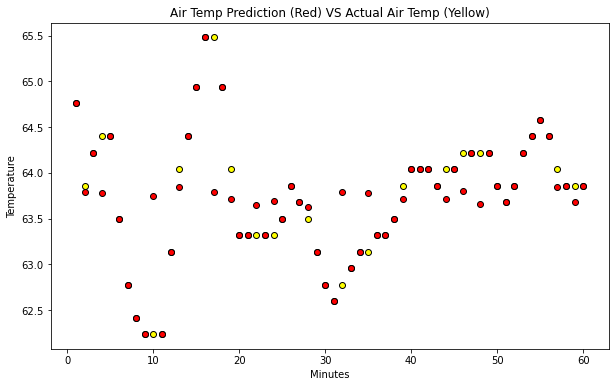

In [255]:
fig, ax = plt.subplots(figsize = (10, 6))
plt.scatter(mergedRes['id'], mergedRes['actual_temp'], color = 'yellow', edgecolor = 'k')
plt.scatter(mergedRes['id'], mergedRes['air_temp'], color = 'red', edgecolor = 'k')
plt.xlabel('Minutes')
plt.ylabel('Temperature')
plt.title('Air Temp Prediction (Red) VS Actual Air Temp (Yellow)')
plt.show()

#### Export latest DataFrame into a CSV File

In [256]:
mergedRes.to_csv (r'C:\Users\USER\Downloads\Project\air-temperature-prediction\export_dataframe_30%.csv', index = False, header = True)